# Complete Statistical Analysis


In [1]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 4.7 MB/s 


In [2]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import jovian

### Table of Contents:

#### 1. Descriptive Statistics:

- Measure of Central Tendancy

> 1. Mean 
> 2.   Geometric mean
>3.   Harmonic mean
>4.   Mode
>5.   Median

- Measure of Variability/Dispersion

> 1.   Variance
>2.   Standard deviation
>3.   Shape of Data
>4.   Inter Quartile Range (IQR) / percentiles
>5.   Range
> 6. Mean Absolute Deviation(MAD)

#### 2. Inferential Statistics:
> 1.   Population vs. Sample
>2.   Data Sampling
>3.   Central Limit Theorem
>4.   Confidence Interval
>5.   Hypothesis Testing
>6. Z-score
> 1.   P-value
>2.   T-tests
>3.   ANOVA
>4.   Chi-squared Test

#### 3.Visualizing Data Distribution:
> 1.   Boxplot
>2.   Histograms
>3.   Denisity Plots
>4.   Normal Q-Q Plots
>5.   Scatterplots
>6. Barchart
> 1.   Piechart

### Importing Data and Libraries

Importing Libraries

In [4]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Download the data

In [5]:
data_url='https://www.kaggle.com/datasets/kukuroo3/body-performance-data'

In [6]:
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohitkmr95
Your Kaggle Key: ··········


100%|██████████| 249k/249k [00:00<00:00, 70.6MB/s]

### Loading data

In [7]:
df= pd.read_csv('/content/body-performance-data/bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

### 1. Descriptive Statistics:

#### 1.1 Measure of Central Tendancy

**Mean:**

> The “Mean” is the average of the data.



In [10]:
# Mean of all the columns in dataframe
df.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [11]:
df['height_cm'].mean()

168.5598073620548

**Geometric Mean:**

> The Geometric Mean (GM) is the average value or mean which signifies the central tendency of the set of numbers by finding the product of their values.



In [12]:
from scipy.stats import gmean
gmean(df['height_cm'])

168.34732191180555

**Harmonic Mean:**
> The Harmonic Mean (HM) is defined as the reciprocal of the average of the reciprocals of the data values.

In [13]:
statistics.harmonic_mean(df['height_cm'])

168.1329276755062

**Mode:**
> Mode is frequently occurring data or elements.
If an element occurs the highest number of times, it is the mode of that data.

In [14]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [15]:
df['height_cm'].mode()

0    170.0
dtype: float64

**Median:**
> Median is the point at which half the data is more and half the data is less. It represents the middle value for any group.

In [16]:
statistics.median(df['height_cm'])

169.2

#### 1.2 Measure of Variability/Dispersion

**Variance:**
>  

*   Variance is a measure of how far individual (numeric) values in a dataset are from the mean or average value in statistics.
*   A high variance tells us that the values in our dataset are far from their mean. So, our data will have high levels of variability.
*   A low variance tells us that the values are quite close to the mean. In this case, the data will have low levels of variability.

In [17]:
statistics.variance(df['height_cm'])

71.00729348140638

**Standard Deviation:**

1.   Standard deviation is a measure of dispersement in statistics.
2.   “Dispersement” tells you how much your data is spread out.

In [18]:
statistics.stdev(df['height_cm'])

8.426582550560244

**Shape of Data:**
>

1.   Symmetric
2.   Skewness
> i. Positively skewed & Negatively skewed


In [19]:
df.skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

**Inter Quartile Range(IQR):**
>The interquartile range tells you the spread of the middle half of your distribution.

>Interquartile range = Upper Quartile – Lower Quartile = Q­3 – Q­1


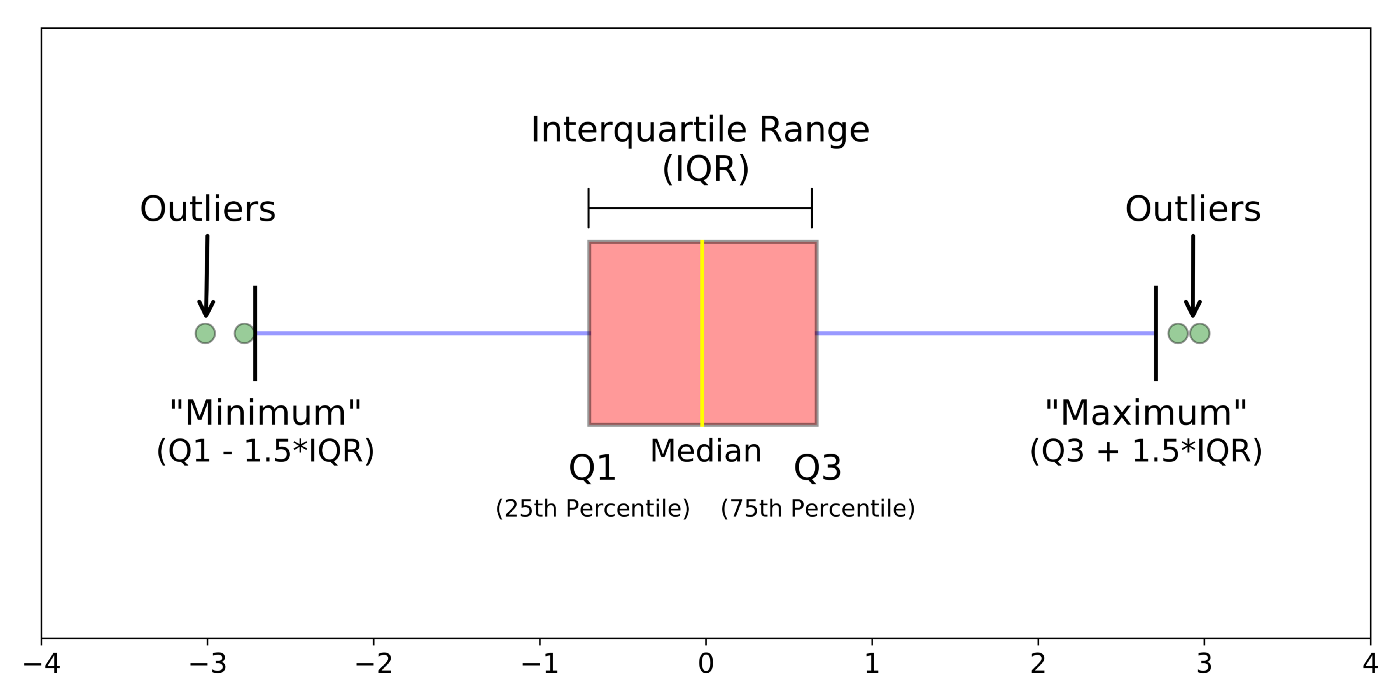

In [20]:
numeric_data.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [21]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR)) 

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


In [22]:
#We can also find different percentiles of particular column
df['height_cm'].quantile([0.1,0.2,0.4,0.5])

0.1    156.9
0.2    160.7
0.4    166.8
0.5    169.2
Name: height_cm, dtype: float64

**Range:**
> The range of data is the difference between the maximum and minimum element in the dataset.

In [23]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of age : 43
range of height_cm : 68
range of weight_kg : 111
range of body fat_% : 75
range of diastolic : 156
range of systolic : 201
range of gripForce : 70
range of sit and bend forward_cm : 238
range of sit-ups counts : 80
range of broad jump_cm : 303


**Mean Absolute Deviation(MAD):**
> The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.

In [24]:
df.mad()

age                        11.844362
height_cm                   6.919084
weight_kg                   9.680199
body fat_%                  5.833442
diastolic                   8.651310
systolic                   12.026424
gripForce                   9.068306
sit and bend forward_cm     6.268510
sit-ups counts             11.571289
broad jump_cm              32.726099
dtype: float64

### 2. Inferential Statistics

#### 2.1 Data Sampling
> Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined.

In [25]:
#random sampling
df.sample(6)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
6679,24.0,M,173.0,71.0,11.0,79.0,139.0,49.2,20.6,50.0,254.0,B
2744,30.0,M,175.1,75.5,18.4,99.0,141.0,46.1,5.3,32.0,228.0,D
7385,27.0,M,181.1,60.9,10.8,72.0,128.0,38.5,7.3,38.0,228.0,C
9269,28.0,F,162.5,60.8,30.8,75.0,106.0,25.6,22.2,42.0,172.0,A
12365,38.0,M,178.2,90.7,21.6,86.0,139.0,56.4,3.6,50.0,211.0,D
9128,39.0,F,159.0,54.9,18.9,62.0,116.0,30.6,24.4,51.0,198.0,A


#### 2.2 Central Limit Theorem:
> The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.

#### 2.3 Confiedence Interval:
> Confidence Interval is a type of estimate computed from the statistics of the observed data which gives a range of values that’s likely to contain a population parameter with a particular level of confidence.

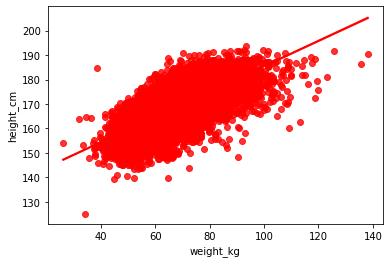

In [26]:
sns.regplot(data = df, x="weight_kg", y="height_cm", ci=95, color='red')

In [27]:
# Method to calculate Confidence Interval (C.I)

def mean_confidence_interval(data, confidence=0.95):
    
    """Compute mean and t-based confidence interval for the data.

    Parameters
    ----------
    data : array like
    confidence : float
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    """
    Returns
    -------
    mean : numpy.ndarray
        The data mean.
    ci : float
        The confidence interval around the mean.
    """
    return m, m-h, m+h

In [28]:
mean_confidence_interval(df['weight_kg'], confidence=0.95)

(67.4473157619652, 67.2449187070222, 67.6497128169082)

In [29]:
mean_confidence_interval(df['height_cm'], confidence=0.95)

(168.5598073620548, 168.41708241538646, 168.70253230872316)

In [30]:
# In-built function to calculate C.I
import statsmodels.api as sm

sm.stats.DescrStatsW(df['weight_kg']).zconfint_mean()

(67.24493699957557, 67.64969452435483)

In [31]:
sm.stats.DescrStatsW(df['height_cm']).zconfint_mean()

(168.41709531480197, 168.7025194093077)

#### 2.4 Hypothesis Testing

Hypothesis testing is a part of statistical analysis, where we test the assumptions made regarding a population parameter.

The two types of hypothesis testing are null hypothesis and alternate hypothesis:

1.   Null hypothesis is the initial assumption about an event (also referred to as the ground truth).
2.   Alternate hypothesis is an assumption that counters the initial assumption.



#### 2.5 Z-score:
> Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset.
In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

In [32]:
import scipy.stats as stats

z_scores = stats.zscore(numeric_data)

z_scores

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418
13389,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177
13390,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013
13391,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878


#### 2.6 P Value:
> 1. A p-value explains the likelihood of an assumption being true based on the null hypothesis. It is an abbreviation for probability value.
2. The smaller our p-value is, the more delicate it is to trust our null hypothesis.
3. p-value is usually within the range of 0 and 1.


In [33]:
p_value_1 = scipy.stats.norm.sf(abs(-0.717)) #left-tailed includes the lowest values

p_value_2 = scipy.stats.norm.sf(abs(z_scores))  #right-tailed - A right-tailed test or upper test is the inequality that is pointing to the right.

p_value_3 = scipy.stats.norm.sf(abs(z_scores))*2  #two-tailed - Procedure that uses a two-sided critical area of a distribution to determine if a sample is larger than or less than a given range of values.

p_value_1, p_value_2, p_value_3

(0.23668704832971305,
 array([[0.23655375, 0.32856721, 0.2571522 , ..., 0.35296889, 0.0782471 ,
         0.25015292],
        [0.19373361, 0.33634264, 0.16484602, ..., 0.44868532, 0.17705837,
         0.16477687],
        [0.33583507, 0.09506216, 0.18858371, ..., 0.35215483, 0.25899514,
         0.40943255],
        ...,
        [0.43514372, 0.15259011, 0.1373405 , ..., 0.44401042, 0.35708585,
         0.16477687],
        [0.02285084, 0.00384425, 0.20732781, ..., 0.23865955, 0.0026694 ,
         0.00193925],
        [0.41930351, 0.29420486, 0.45511301, ..., 0.16879076, 0.21577557,
         0.39971354]]),
 array([[0.47310751, 0.65713442, 0.5143044 , ..., 0.70593779, 0.15649419,
         0.50030583],
        [0.38746721, 0.67268529, 0.32969203, ..., 0.89737064, 0.35411674,
         0.32955374],
        [0.67167014, 0.19012432, 0.37716742, ..., 0.70430965, 0.51799027,
         0.81886509],
        ...,
        [0.87028745, 0.30518023, 0.274681  , ..., 0.88802084, 0.71417171,
         0.3

In [34]:
#Example to understand easily:

scipy.stats.norm.sf(abs(0.75))

0.2266273523768682

The p-value is 0.2266. If we use a significance level of α = 0.05, we would fail to reject the null hypothesis of our hypothesis test because this p-value is not less than 0.05.

#### 2.7  T-Tests:
> A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

##### Independent T-test using researchpy

In [35]:
import researchpy as rp
rp.ttest(group1= df['weight_kg'][df['gender'] == 'M'], group1_name= "Male",
         group2= df['weight_kg'][df['gender'] == 'F'], group2_name= "Female")

(   Variable        N       Mean         SD        SE  95% Conf.   Interval
 0      Male   8467.0  73.580187   9.468653  0.102902  73.378474  73.781899
 1    Female   4926.0  56.905899   7.639541  0.108848  56.692509  57.119290
 2  combined  13393.0  67.447316  11.949666  0.103256  67.244919  67.649713,
               Independent t-test     results
 0  Difference (Male - Female) =      16.6743
 1          Degrees of freedom =   13391.0000
 2                           t =     105.2606
 3       Two side test p value =       0.0000
 4      Difference < 0 p value =       1.0000
 5      Difference > 0 p value =       0.0000
 6                   Cohen's d =       1.8862
 7                   Hedge's g =       1.8861
 8              Glass's delta1 =       1.7610
 9            Point-Biserial r =       0.6729)

##### Independent T-test using Scipy.stats

In [36]:
stats.ttest_ind(df['weight_kg'][df['gender'] == 'M'],
                df['weight_kg'][df['gender'] == 'F'])

Ttest_indResult(statistic=105.26060814440554, pvalue=0.0)

#### 2.8 ANOVA:
ANOVA is a word coined from ‘Analysis of Variance’. 
- It is a statistical concept that shows the differences between the means of more than two independent groups, using variance analysis on samples from those groups.
- It is used for checking the contrast between three or more samples with one test. Especially when the categorical class has over two categories.
- During ANOVA testing, the hypothesis is:
   >1. H0: When all samples’ means are the same.
  2. H1: When one or more samples are very much different.

##### 2.8.1 One way ANOVA test :

This is employed to determine the effect of a variable on one or two other variables by comparing their means. Using the example we will check if weight_kg, has an effect on body fat_% and sit-ups counts using one-way ANOVA test.

In [37]:
from scipy.stats import f_oneway

class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit-ups counts'] 

print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


Since our p-value is 0, we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.

This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.

##### 2.8.2 Two way ANOVA test :

This is called when we are dealing with three or more variables, trying to compare their means with each other.

In [38]:
from statsmodels.formula.api import ols

weight = df['weight_kg']
height = df['height_cm']
fat = df['body fat_%']
classes = df['class']

model = ols('weight ~ C(fat) ', data=numeric_data).fit()

print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df        F        PR(>F)
C(fat)    1.320194e+05    526.0  1.81387  1.015159e-25
Residual  1.780285e+06  12866.0      NaN           NaN


##### 2.8.3 ANOVA using pingouin

In [39]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 7.0 MB/s 
     |████████████████████████████████| 9.9 MB 45.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=9184a114de7205baf29d6e36e982a4bb5a1a54f12e1b4214430e8d15c07fe0c0
  Stored in directory: /root/.cache/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=942fd787ae991d77f8e2c3d6f29d1b8035117961b0c07e3f8103f6dcfacbe621
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [40]:
import pingouin as pg

# Run the ANOVA using pingouin

aov = pg.anova(data=df, dv='weight_kg', between='class', detailed=True)
print(aov)

   Source            SS     DF            MS           F          p-unc  \
0   class  1.039553e+05      3  34651.766845  256.561377  6.702274e-162   
1  Within  1.808349e+06  13389    135.062289         NaN            NaN   

        np2  
0  0.054361  
1       NaN  


#### 2.9 Chi-squared Test:

- Chi-Square test is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data.
- The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them.
- The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.
- A low value for chi-square means there is a high correlation between your two sets of data.

In [41]:
# create contingency table

data_cont_tab = pd.crosstab(df['gender'],
                            df['class'],
                           margins=True, margins_name="Total")

data_cont_tab

class,A,B,C,D,Total
gender,,,,,
F,1484,1185,1112,1145,4926
M,1864,2162,2237,2204,8467
Total,3348,3347,3349,3349,13393


In [42]:
# significance level

alpha = 0.05

In [43]:
# Calcualtion of Chisquare

chi_square = 0
rows = df['gender'].unique()
columns = df['class'].unique()
for i in columns:
    for j in rows:
        O = data_cont_tab[i][j]
        E = data_cont_tab[i]['Total'] * data_cont_tab['Total'][j] / data_cont_tab['Total']['Total']
        chi_square += (O-E)**2/E

In [44]:
# The p-value approach

print("Approach 1: The p-value approach to hypothesis testing in the decision rule")

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and p value is: 0.0
Null Hypothesis is rejected.


In [45]:
# The critical value approach

print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


### 3. Visualising Data Distribution

#### 3.1 Boxplot:
> Boxlot can plot outliers in data

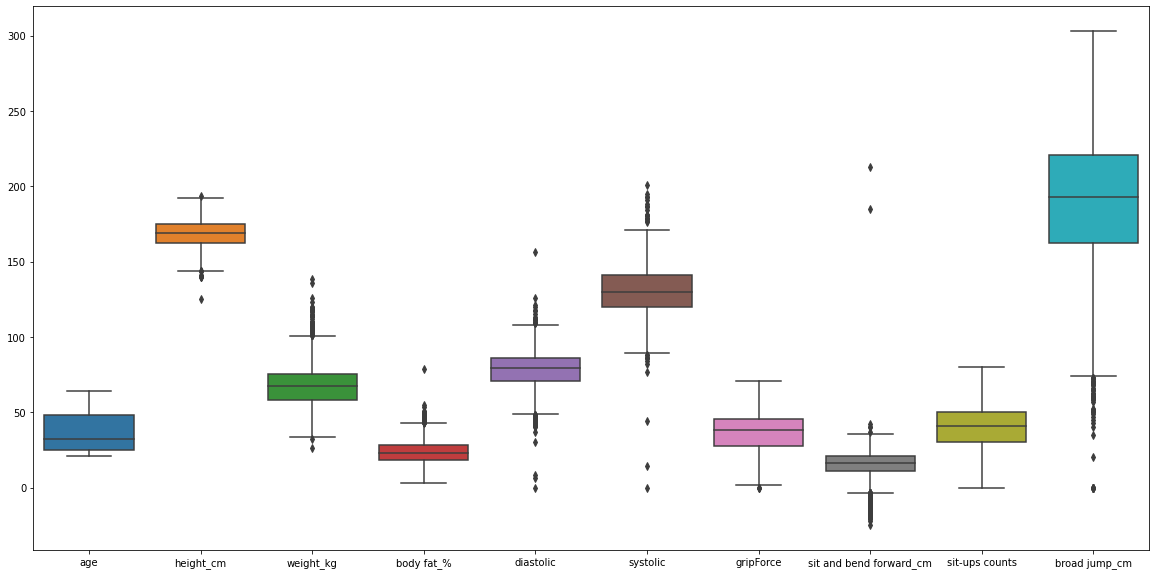

In [46]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)

Outliers And Its Removal:

-> Removing Outliers using IQR :

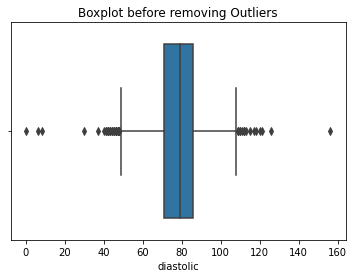

In [47]:
#Take an example by removing outliers in 'diastolic' column

sns.boxplot(df['diastolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

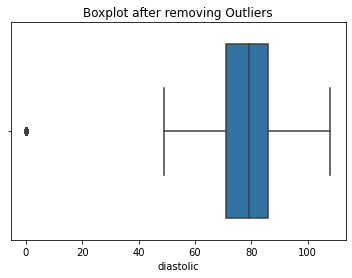

In [48]:
# Removing Outliers

for i in df['diastolic']:
    q1 = df['diastolic'].quantile(0.25)
    q3 = df['diastolic'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['diastolic'] = df['diastolic'].replace(i,0)
        
sns.boxplot(df['diastolic'])
plt.title('Boxplot after removing Outliers')
plt.show()

#### 3.2 Histograms:

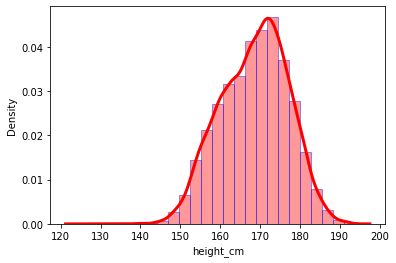

In [49]:
sns.distplot(df['height_cm'], hist=True, kde=True, 
             bins=25, color = 'red', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth':3})

#### 3.3 Normal Q-Q Plot:

In [50]:
import statsmodels.api as sm

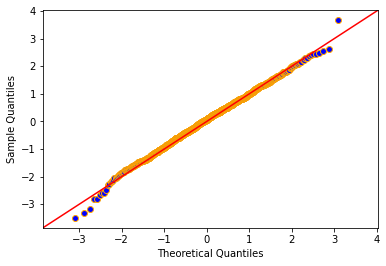

<Figure size 288x288 with 0 Axes>

In [51]:
#create Q-Q plot with 45-degree line added to plot for normal data
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45', color='orange')
plt.figure(figsize=(4,4))
plt.show()

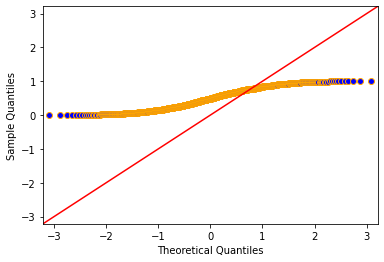

<Figure size 216x288 with 0 Axes>

In [52]:
#create Q-Q plot with 45-degree line added to plot for uniform distributed data

data = np.random.uniform(0,1, 1000)
fig = sm.qqplot(data, line='45', color='orange')
plt.figure(figsize=(3,4))
plt.show()

#### 3.4 Scatterplot:

<Figure size 1080x2016 with 0 Axes>

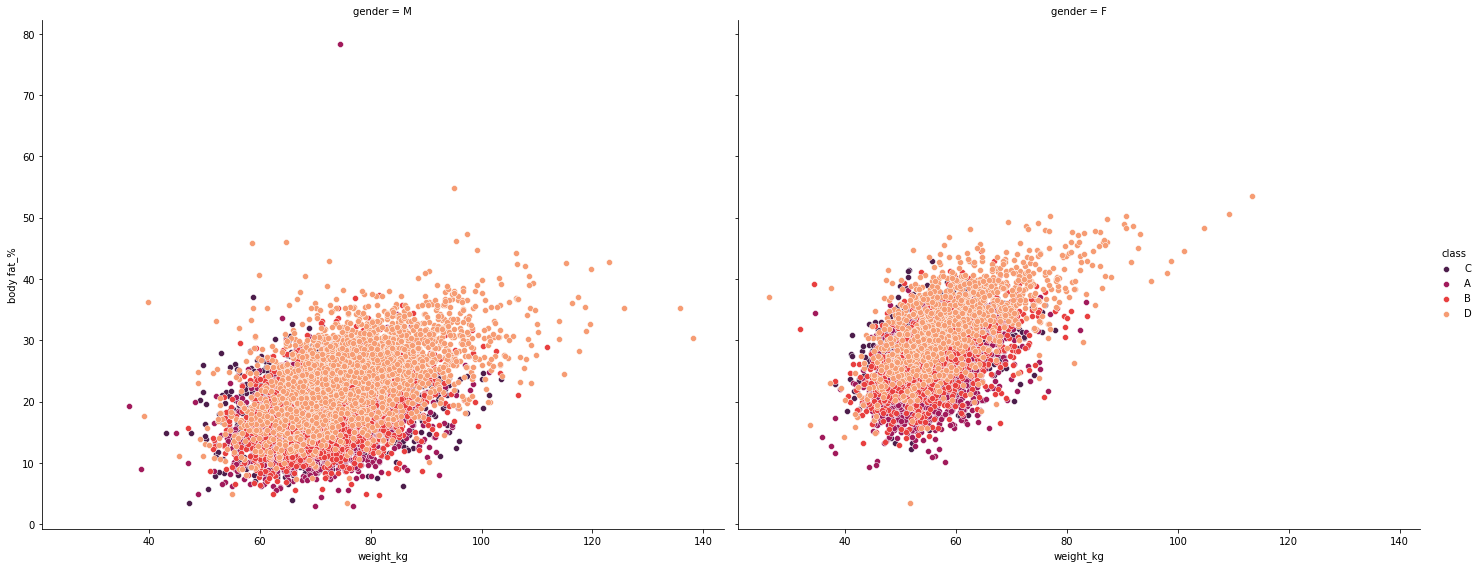

In [53]:
plt.figure(figsize = (15,28))
g = sns.FacetGrid(df, col="gender", hue="class",height=8, aspect=10/8, palette="rocket")
g.map(sns.scatterplot, "weight_kg", "body fat_%")
g.add_legend()

#### 3.5 Barchart:

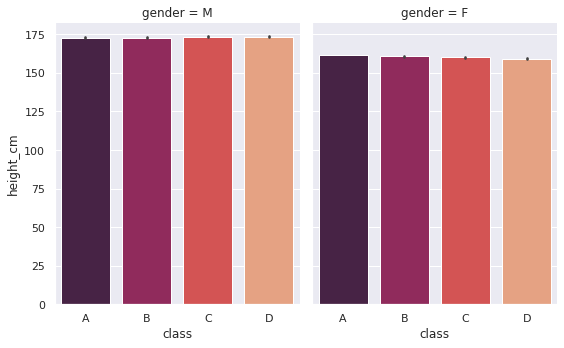

In [54]:
sns.set(rc = {'figure.figsize':(8,6)})
g = sns.FacetGrid(df, col="gender", height=5, aspect=0.8 )
g.map(sns.barplot, "class", "height_cm",order=['A','B','C','D'], palette='rocket' )

Body fat % belonging to different class in different gender

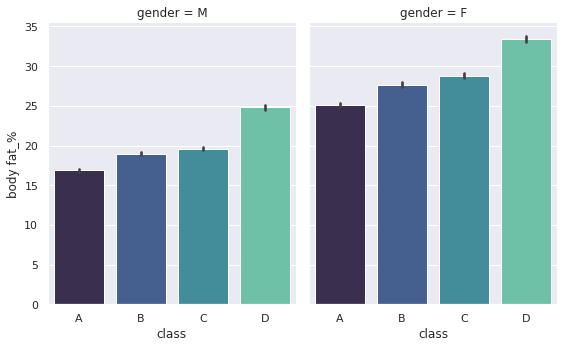

In [55]:
sns.set(rc = {'figure.figsize':(8,6)})
g = sns.FacetGrid(df, col="gender", height=5, aspect=0.8 )
g.map(sns.barplot, "class", "body fat_%",order=['A','B','C','D'], palette='mako' )

Count of Gender wise in different class

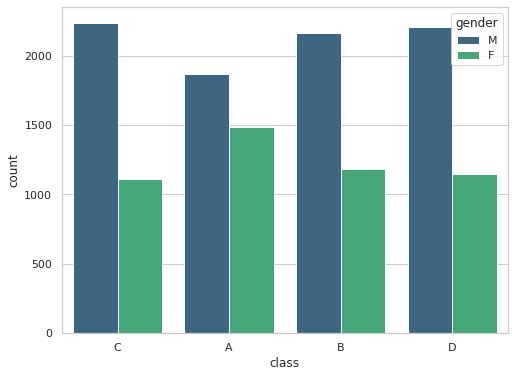

In [56]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.countplot(x='class',hue='gender',data=df,palette='viridis')

#### 3.6 Piechart:

Situp counts by Class

<Figure size 1440x576 with 0 Axes>

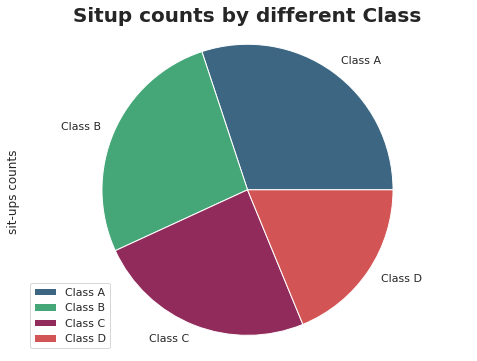

In [57]:
plt.figure(figsize=(20, 8))
labels=['Class A', 'Class B', 'Class C','Class D']
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#3C6682', '#45A778', '#902B5C','#D35454'])
plt.axis('equal')
plt.title('Situp counts by different Class', fontsize=20, fontweight='bold');

Gender Ratio in Body Fat

<Figure size 1080x432 with 0 Axes>

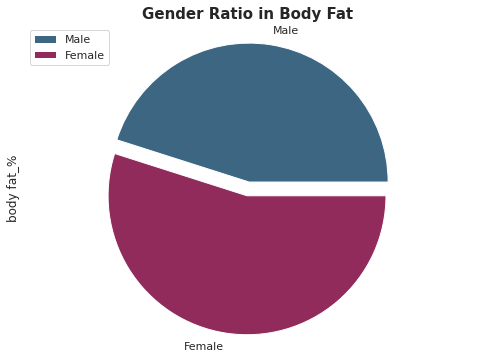

In [58]:
plt.figure(figsize=(15, 6))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#3C6682', '#902B5C'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold');

Gender Ratio in height

<Figure size 1080x432 with 0 Axes>

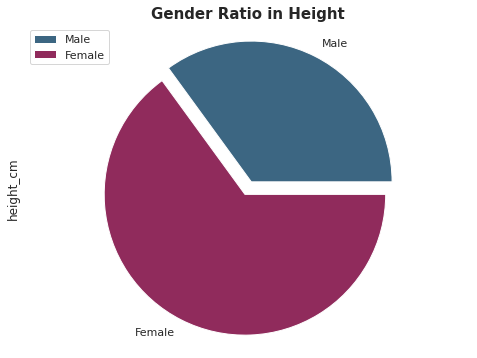

In [59]:
plt.figure(figsize=(15, 6))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='height_cm',labels=labels, colors=['#3C6682', '#902B5C'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Height', fontsize=15, fontweight='bold');

In [60]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
